# Project: Time Series Forecasting: Predicting the S&P 500 Using Advanced Models  
**Authors:** Sukumar Chigurupati

---

## Introduction and Research Question  

**Challenge:**  
Forecasting the S&P 500 index is a complex task due to the dynamic nature of financial markets. The index is influenced by multiple factors such as economic indicators, technical patterns, and investor sentiment. Understanding and predicting these movements is crucial for making informed investment and policy decisions.  

**Research Question:**  
*Can incorporating selected economic indicators into time series models improve the accuracy of forecasting the S&P 500 index and help predict bearish market conditions?*  

**Objectives:**  
1. Collect and preprocess historical S&P 500 data and relevant economic indicators.  
2. Explore the relationship between the S&P 500 index and selected economic/technical indicators.  
3. Apply and compare various forecasting models, including ARIMA, ARIMAX, TimeGPT, and LSTM.  
4. Evaluate whether incorporating additional indicators improves forecast accuracy.  
5. Interpret the results to assess the significance of different factors influencing the S&P 500.  

---  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install pmdarima
!pip install nixtla


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.3 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('final_dataset.csv')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12722 entries, 0 to 12721
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         12722 non-null  object 
 1   S&P500_Close                       12721 non-null  float64
 2   S&P500_Volume                      12721 non-null  float64
 3   Bearish_Score                      12721 non-null  float64
 4   VIX                                12721 non-null  float64
 5   Unemployment Rate                  12722 non-null  float64
 6   Consumer Price Index (CPI)         12722 non-null  float64
 7   Industrial Production Index (IPI)  12722 non-null  float64
 8   Federal Funds Rate                 12722 non-null  float64
 9   Consumer Sentiment Index (CSI)     12722 non-null  float64
 10  10-Year Treasury Yield             12721 non-null  float64
 11  2-Year Treasury Yield              12721 non-null  flo

In [ ]:
df.head()


,Unnamed: 0,S&P500_Close,S&P500_Volume,Bearish_Score,VIX,Unemployment Rate,Consumer Price Index (CPI),Industrial Production Index (IPI),Federal Funds Rate,Consumer Sentiment Index (CSI),10-Year Treasury Yield,2-Year Treasury Yield,RSI,200_MA
0,1990-01-01,NaN,NaN,NaN,NaN,5.4,127.5,61.6352,7.97,93.0,NaN,NaN,NaN,NaN
1,1990-01-02,359.690002,162070000.0,0.000000,17.240000,5.4,127.5,61.6352,8.54,93.0,7.94,7.87,NaN,NaN
2,1990-01-03,358.760010,192330000.0,0.258554,18.190001,5.4,127.5,61.6352,8.37,93.0,7.99,7.94,NaN,NaN
3,1990-01-04,355.670013,177000000.0,1.117626,19.219999,5.4,127.5,61.6352,8.29,93.0,7.98,7.92,NaN,NaN
4,1990-01-05,352.200012,158530000.0,2.082346,20.110001,5.4,127.5,61.6352,8.20,93.0,7.99,7.90,NaN,NaN


In [ ]:
df.describe()

,S&P500_Close,S&P500_Volume,Bearish_Score,VIX,Unemployment Rate,Consumer Price Index (CPI),Industrial Production Index (IPI),Federal Funds Rate,Consumer Sentiment Index (CSI),10-Year Treasury Yield,2-Year Treasury Yield,RSI,200_MA
count,12721.000000,1.272100e+04,12721.000000,12721.000000,12722.000000,12722.000000,12722.000000,12722.000000,12722.000000,12721.000000,12721.000000,12709.000000,12522.000000
mean,1674.589838,2.490177e+09,5.887923,19.408277,5.721365,206.538118,90.071488,2.832651,85.273031,4.247993,3.219715,55.180329,1654.051375
std,1219.229154,1.867272e+09,8.287569,7.834198,1.747908,48.306381,13.073879,2.370162,13.331405,1.970120,2.301229,19.252592,1168.104112
min,295.459991,1.499000e+07,0.000000,9.140000,3.400000,127.500000,60.297300,0.040000,50.000000,0.520000,0.090000,1.569592,323.075600
25%,908.590027,6.655000e+08,0.610563,13.770000,4.400000,163.500000,84.943600,0.200000,75.300000,2.570000,0.900000,41.639767,919.754441
50%,1282.800049,2.579560e+09,2.512987,17.549999,5.400000,207.234000,93.735300,2.400000,88.200000,4.140000,3.070000,55.601432,1280.403778
75%,2094.110107,3.834320e+09,7.167668,22.750000,6.700000,238.034000,100.156300,5.220000,95.100000,5.760000,5.030000,69.098713,2065.923690
max,5864.669922,1.145623e+10,52.578452,82.690002,14.800000,314.686000,104.103800,10.390000,112.000000,9.090000,9.050000,100.000000,5474.250898


In [ ]:
# Rename the date column and convert to datetime
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
df.set_index('Date', inplace=True)  # Set as index

# Check if the dataset is properly indexed and sorted
print("Dataset Info After Setting Date as Index:\n")



Dataset Info After Setting Date as Index:



In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12722 entries, 1990-01-01 to 2024-10-30
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   S&P500_Close                       12721 non-null  float64
 1   S&P500_Volume                      12721 non-null  float64
 2   Bearish_Score                      12721 non-null  float64
 3   VIX                                12721 non-null  float64
 4   Unemployment Rate                  12722 non-null  float64
 5   Consumer Price Index (CPI)         12722 non-null  float64
 6   Industrial Production Index (IPI)  12722 non-null  float64
 7   Federal Funds Rate                 12722 non-null  float64
 8   Consumer Sentiment Index (CSI)     12722 non-null  float64
 9   10-Year Treasury Yield             12721 non-null  float64
 10  2-Year Treasury Yield              12721 non-null  float64
 11  RSI                                12

In [ ]:
print("\nFirst 5 Rows:\n", df.head())


First 5 Rows:
             S&P500_Close  S&P500_Volume  Bearish_Score        VIX  \
Date                                                                
1990-01-01           NaN            NaN            NaN        NaN   
1990-01-02    359.690002    162070000.0       0.000000  17.240000   
1990-01-03    358.760010    192330000.0       0.258554  18.190001   
1990-01-04    355.670013    177000000.0       1.117626  19.219999   
1990-01-05    352.200012    158530000.0       2.082346  20.110001   

            Unemployment Rate  Consumer Price Index (CPI)  \
Date                                                        
1990-01-01                5.4                       127.5   
1990-01-02                5.4                       127.5   
1990-01-03                5.4                       127.5   
1990-01-04                5.4                       127.5   
1990-01-05                5.4                       127.5   

            Industrial Production Index (IPI)  Federal Funds Rate  \
Dat

## Data Cleaning and Preprocessing

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('final_dataset.csv')

# Convert the 'Unnamed: 0' column to 'Date' and set as DatetimeIndex
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Print initial info
print("Dataset Info Before Cleaning:")



Dataset Info Before Cleaning:


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12722 entries, 1990-01-01 to 2024-10-30
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   S&P500_Close                       12721 non-null  float64
 1   S&P500_Volume                      12721 non-null  float64
 2   Bearish_Score                      12721 non-null  float64
 3   VIX                                12721 non-null  float64
 4   Unemployment Rate                  12722 non-null  float64
 5   Consumer Price Index (CPI)         12722 non-null  float64
 6   Industrial Production Index (IPI)  12722 non-null  float64
 7   Federal Funds Rate                 12722 non-null  float64
 8   Consumer Sentiment Index (CSI)     12722 non-null  float64
 9   10-Year Treasury Yield             12721 non-null  float64
 10  2-Year Treasury Yield              12721 non-null  float64
 11  RSI                                12

In [ ]:
print("\nFirst 5 Rows:\n", df.head())




First 5 Rows:
             S&P500_Close  S&P500_Volume  Bearish_Score        VIX  \
Date                                                                
1990-01-01           NaN            NaN            NaN        NaN   
1990-01-02    359.690002    162070000.0       0.000000  17.240000   
1990-01-03    358.760010    192330000.0       0.258554  18.190001   
1990-01-04    355.670013    177000000.0       1.117626  19.219999   
1990-01-05    352.200012    158530000.0       2.082346  20.110001   

            Unemployment Rate  Consumer Price Index (CPI)  \
Date                                                        
1990-01-01                5.4                       127.5   
1990-01-02                5.4                       127.5   
1990-01-03                5.4                       127.5   
1990-01-04                5.4                       127.5   
1990-01-05                5.4                       127.5   

            Industrial Production Index (IPI)  Federal Funds Rate  \
Dat

In [ ]:
# Check for missing values
print("\nMissing Values Before Imputation:\n", df.isnull().sum())




Missing Values Before Imputation:
 S&P500_Close                           1
S&P500_Volume                          1
Bearish_Score                          1
VIX                                    1
Unemployment Rate                      0
Consumer Price Index (CPI)             0
Industrial Production Index (IPI)      0
Federal Funds Rate                     0
Consumer Sentiment Index (CSI)         0
10-Year Treasury Yield                 1
2-Year Treasury Yield                  1
RSI                                   13
200_MA                               200
dtype: int64


In [ ]:
# Forward-fill missing values
df = df.ffill()

# After forward fill, check again
print("\nMissing Values After Forward-Fill:\n", df.isnull().sum())




Missing Values After Forward-Fill:
 S&P500_Close                           1
S&P500_Volume                          1
Bearish_Score                          1
VIX                                    1
Unemployment Rate                      0
Consumer Price Index (CPI)             0
Industrial Production Index (IPI)      0
Federal Funds Rate                     0
Consumer Sentiment Index (CSI)         0
10-Year Treasury Yield                 1
2-Year Treasury Yield                  1
RSI                                   13
200_MA                               200
dtype: int64


In [ ]:
df = df[df['200_MA'].notnull()]  # Drop rows until 200_MA is calculable

# Check one more time for missing values
print("\nMissing Values After Dropping Early Rows:\n", df.isnull().sum())




Missing Values After Dropping Early Rows:
 S&P500_Close                         0
S&P500_Volume                        0
Bearish_Score                        0
VIX                                  0
Unemployment Rate                    0
Consumer Price Index (CPI)           0
Industrial Production Index (IPI)    0
Federal Funds Rate                   0
Consumer Sentiment Index (CSI)       0
10-Year Treasury Yield               0
2-Year Treasury Yield                0
RSI                                  0
200_MA                               0
dtype: int64


In [ ]:
# Basic descriptive statistics
print("\nSummary Statistics:")
display(df.describe())




Summary Statistics:


,S&P500_Close,S&P500_Volume,Bearish_Score,VIX,Unemployment Rate,Consumer Price Index (CPI),Industrial Production Index (IPI),Federal Funds Rate,Consumer Sentiment Index (CSI),10-Year Treasury Yield,2-Year Treasury Yield,RSI,200_MA
count,12522.000000,1.252200e+04,12522.000000,12522.000000,12522.000000,12522.000000,12522.000000,12522.000000,12522.000000,12522.000000,12522.000000,12522.000000,12522.000000
mean,1695.721756,2.527243e+09,5.907845,19.397438,5.727544,207.779048,90.514158,2.746255,85.183980,4.179806,3.136748,55.204512,1654.051375
std,1217.207724,1.858569e+09,8.343885,7.886912,1.761076,47.673949,12.696014,2.287440,13.416261,1.909192,2.222330,19.218589,1168.104112
min,295.459991,1.499000e+07,0.000000,9.140000,3.400000,130.500000,60.297300,0.040000,50.000000,0.520000,0.090000,1.569592,323.075600
25%,930.080017,7.167775e+08,0.598837,13.720000,4.400000,164.700000,86.010800,0.200000,75.000000,2.540000,0.890000,41.680659,919.754441
50%,1291.210022,2.655330e+09,2.481241,17.485000,5.400000,208.547000,94.049300,2.370000,87.700000,4.100000,2.950000,55.552910,1280.403778
75%,2102.060059,3.846245e+09,7.176251,22.770000,6.700000,238.992000,100.292300,5.170000,95.100000,5.690000,4.970000,69.099795,2065.923690
max,5864.669922,1.145623e+10,52.578452,82.690002,14.800000,314.686000,104.103800,10.390000,112.000000,9.050000,8.320000,100.000000,5474.250898


In [ ]:
# Display the first few rows after cleaning
print("First 5 Rows After Cleaning:\n", df.head())

First 5 Rows After Cleaning:
             S&P500_Close  S&P500_Volume  Bearish_Score        VIX  \
Date                                                                
1990-07-20    361.609985    177810000.0       1.989437  15.630000   
1990-07-21    361.609985    177810000.0       1.989437  15.630000   
1990-07-22    361.609985    177810000.0       1.989437  15.630000   
1990-07-23    355.309998    209030000.0       3.696982  23.680000   
1990-07-24    355.790009    181920000.0       3.566880  21.790001   

            Unemployment Rate  Consumer Price Index (CPI)  \
Date                                                        
1990-07-20                5.5                       130.5   
1990-07-21                5.5                       130.5   
1990-07-22                5.5                       130.5   
1990-07-23                5.5                       130.5   
1990-07-24                5.5                       130.5   

            Industrial Production Index (IPI)  Federal Fun



**Data Collection and Preprocessing**

-   **S&P 500 data**: Historical prices from Yahoo Finance.
-   **Economic indicators**: FRED (Federal Reserve Economic Data), including variables like VIX, Unemployment Rate, CPI, Treasury Yields, and more.
-   **Technical indicators**: RSI and 200-day moving average.

**Preprocessing Steps:**

1.  Merging multiple datasets into a single `final_dataset.csv`.
2.  Handling missing values using forward and backward filling.
3.  Aligning all data to a consistent business-day frequency.
4.  Selecting relevant features based on correlation analysis and multicollinearity checks (e.g., VIF analysis).

## EDA

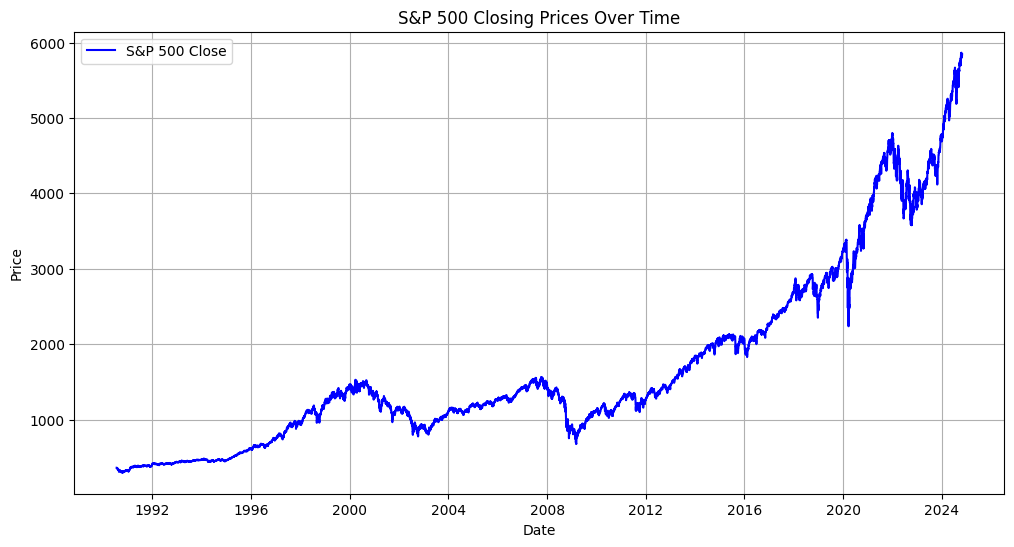

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Plot S&P 500 Closing Prices
plt.figure(figsize=(12,6))
plt.plot(df.index, df['S&P500_Close'], label='S&P 500 Close', color='blue')
plt.title('S&P 500 Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()




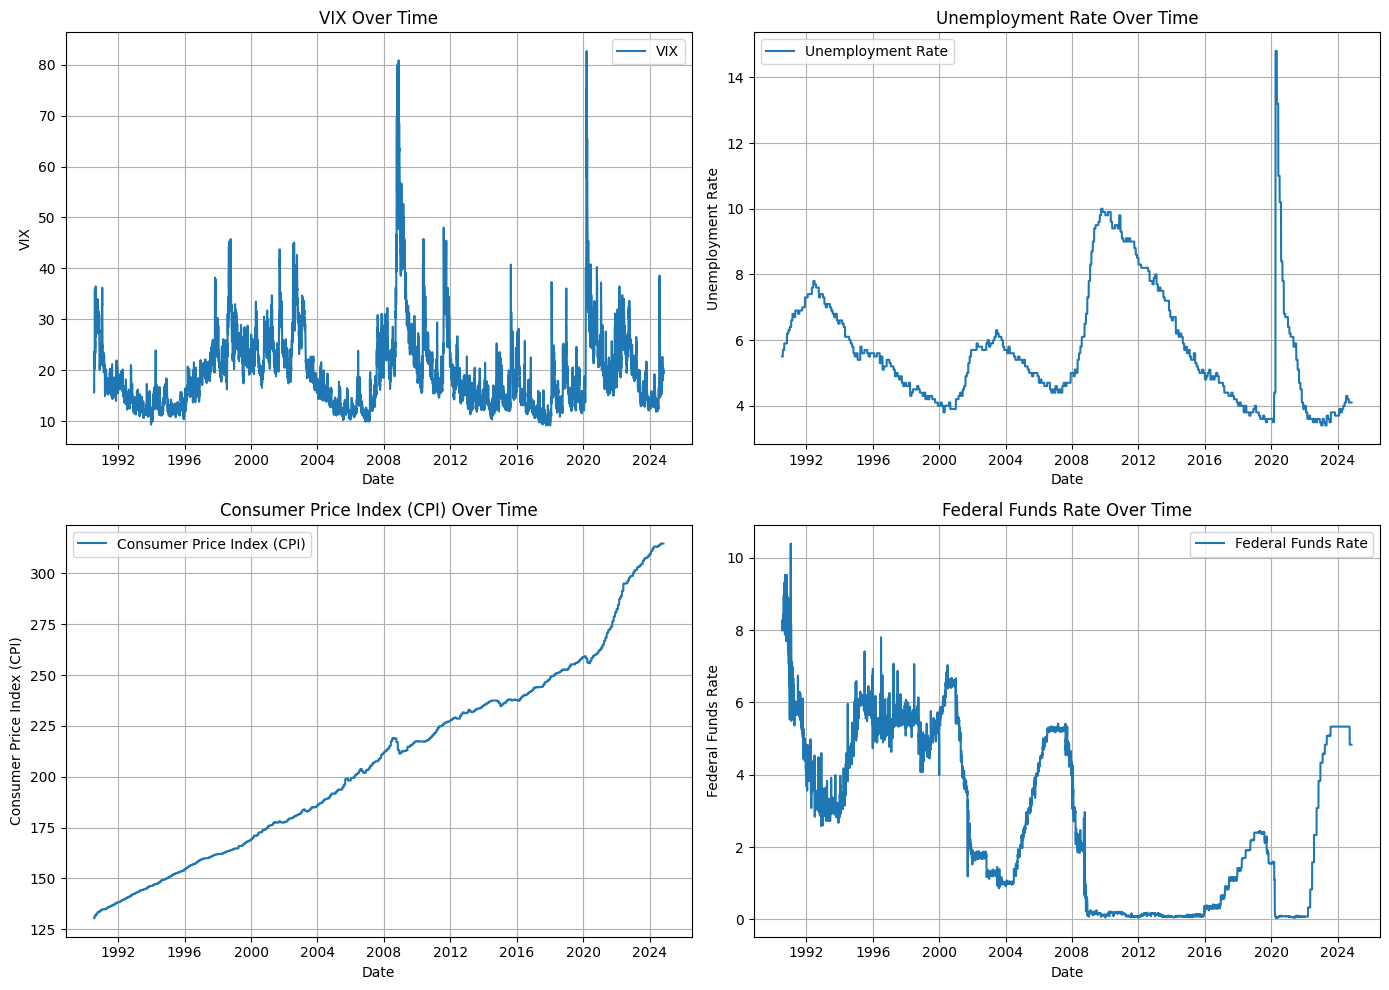

In [ ]:
# Plot a few key economic indicators to get a sense of their behavior
fig, axes = plt.subplots(2, 2, figsize=(14,10))
indicators = ['VIX', 'Unemployment Rate', 'Consumer Price Index (CPI)', 'Federal Funds Rate']
for ax, ind in zip(axes.flatten(), indicators):
    ax.plot(df.index, df[ind], label=ind)
    ax.set_title(f"{ind} Over Time")
    ax.set_xlabel('Date')
    ax.set_ylabel(ind)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()



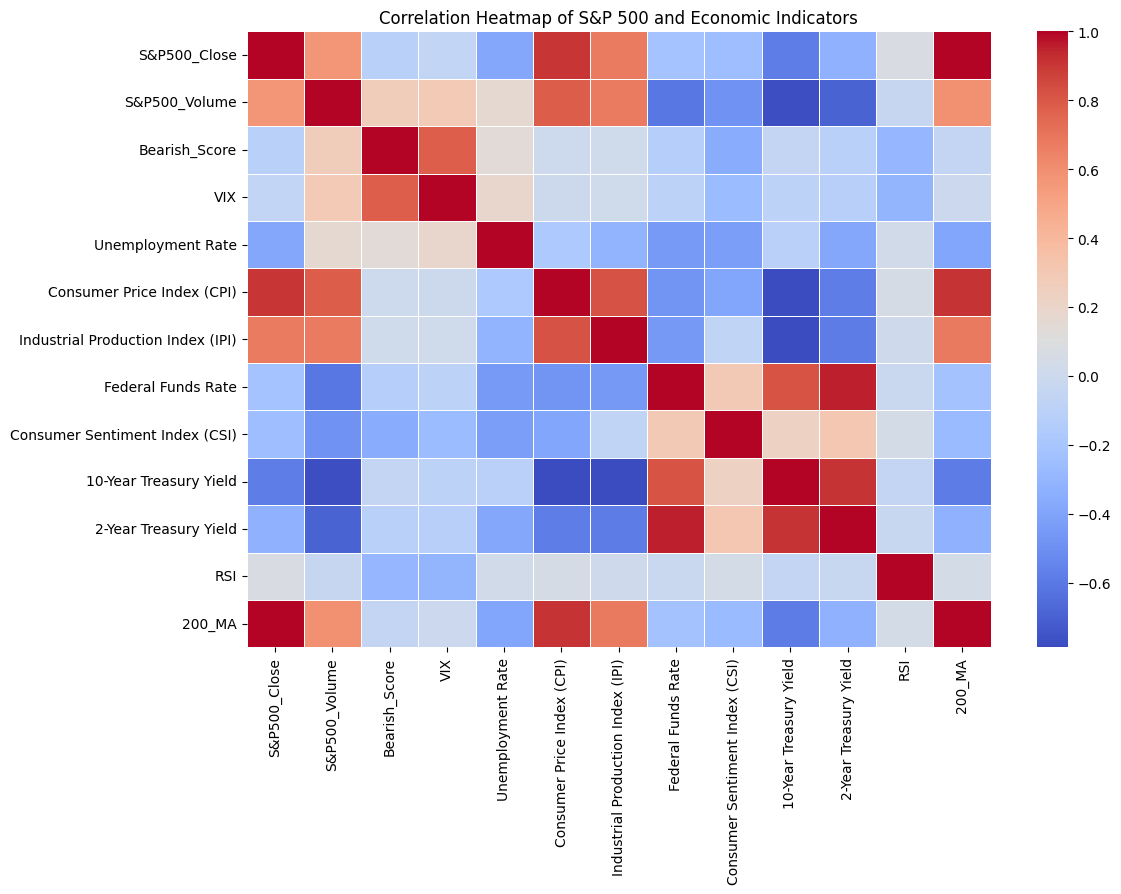

Correlation of Each Variable with S&P500_Close:
 S&P500_Close                         1.000000
200_MA                               0.995098
Consumer Price Index (CPI)           0.907763
Industrial Production Index (IPI)    0.673016
S&P500_Volume                        0.571388
RSI                                  0.073202
VIX                                 -0.060595
Bearish_Score                       -0.111715
Federal Funds Rate                  -0.216009
Consumer Sentiment Index (CSI)      -0.250743
2-Year Treasury Yield               -0.320733
Unemployment Rate                   -0.384409
10-Year Treasury Yield              -0.582589
Name: S&P500_Close, dtype: float64


In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of S&P 500 and Economic Indicators")
plt.show()

# Print top correlations with S&P500_Close
sp_corr = correlation_matrix['S&P500_Close'].sort_values(ascending=False)
print("Correlation of Each Variable with S&P500_Close:\n", sp_corr)



In [ ]:
# ADF Test for stationarity on S&P500_Close
result = adfuller(df['S&P500_Close'], autolag='AIC')
print("\nAugmented Dickey-Fuller Test on S&P500_Close:")
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

if result[1] <= 0.05:
    print("The S&P500_Close series is stationary.")
else:
    print("The S&P500_Close series is non-stationary and may require differencing.")


Augmented Dickey-Fuller Test on S&P500_Close:
ADF Statistic: 2.850736156179222
p-value: 1.0
Critical Values:
   1%, -3.430874048187982
Critical Values:
   5%, -2.8617716031962726
Critical Values:
   10%, -2.5668932773865953
The S&P500_Close series is non-stationary and may require differencing.


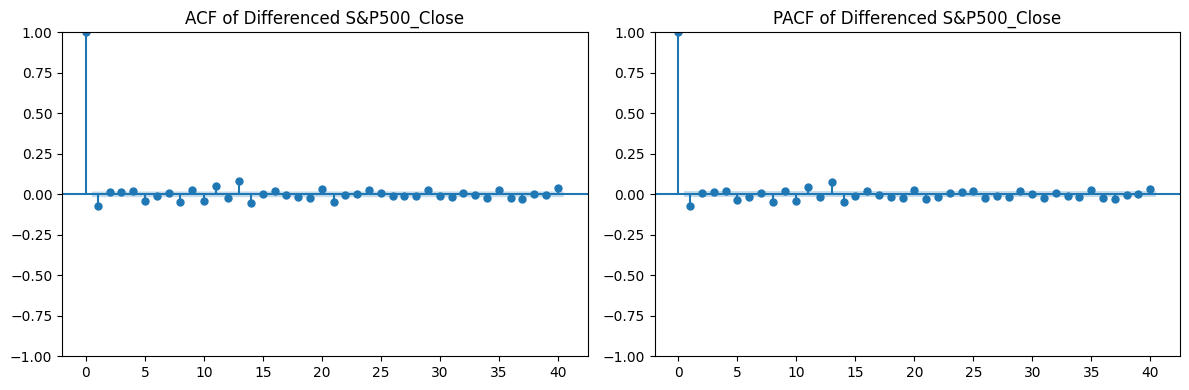

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Create a differenced series to achieve stationarity
df['S&P500_Close_diff'] = df['S&P500_Close'].diff().dropna()

# Drop the first row of NaN after differencing
df_diff = df['S&P500_Close_diff'].dropna()

# Plot ACF and PACF for the differenced series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_diff, ax=axes[0], lags=40)
axes[0].set_title('ACF of Differenced S&P500_Close')

plot_pacf(df_diff, ax=axes[1], lags=40, method='ywm')
axes[1].set_title('PACF of Differenced S&P500_Close')

plt.tight_layout()
plt.show()




**Exploratory Data Analysis (EDA)**

-   **Trend Analysis**: Visualized the long-term trend of the S&P 500 index and observed key events like financial crises or rapid recoveries.
-   **Indicator Insights**: Explored trends in economic indicators like the Unemployment Rate and CPI.
-   **Correlation Heatmap**: Identified relationships between variables and selected features with meaningful correlations to the S&P 500.
-   **Stationarity Tests**: Conducted the Augmented Dickey-Fuller (ADF) test, confirming the need for differencing the S&P 500 series to achieve stationarity.

## Baseline Model: Univariate ARIMA

In [ ]:
# Split data into training and test sets (e.g., last 20% for test)
train_size = int(len(df_diff)*0.8)
train, test = df_diff[:train_size], df_diff[train_size:]

# Use auto_arima to suggest an ARIMA order
stepwise_model = auto_arima(train,
                            start_p=0, start_q=0,
                            max_p=5, max_q=5,
                            seasonal=False, trace=True,
                            error_action='ignore', suppress_warnings=True)
print("Auto-ARIMA Model Summary:")
print(stepwise_model.summary())



Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=75986.385, Time=0.54 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=75955.736, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=75955.353, Time=1.16 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=75957.187, Time=1.40 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=75957.178, Time=2.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=75948.836, Time=8.34 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=75950.126, Time=10.78 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=75948.622, Time=7.29 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=75959.109, Time=1.25 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=75952.817, Time=6.83 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=75939.532, Time=3.98 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=75946.845, Time=1.88 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=75941.501, Time=9.90 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=75941.487, Time=7.04 sec
 ARIMA(0,0,5)(0,0,

In [ ]:
# Fit the chosen ARIMA model
p, d, q = stepwise_model.order
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:      S&P500_Close_diff   No. Observations:                10016
Model:                 ARIMA(3, 0, 5)   Log Likelihood              -37954.070
Date:                Fri, 13 Dec 2024   AIC                          75928.139
Time:                        16:26:02   BIC                          76000.259
Sample:                    07-21-1990   HQIC                         75952.549
                         - 12-21-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1967      0.098      2.014      0.044       0.005       0.388
ar.L1         -0.8195      0.089     -9.206      0.000      -0.994      -0.645
ar.L2          0.5059      0.100      5.068      0.0

In [ ]:
# Forecast on the test set
n_steps = len(test)
forecast = model_fit.forecast(steps=n_steps)
forecast_index = test.index
forecast_series = pd.Series(forecast, index=forecast_index)

# Convert forecasted differenced values back to original scale
# To do this, we need the last known historical price before the test period:
last_train_price = df['S&P500_Close'].iloc[train_size]
reconstructed_forecast = last_train_price + forecast_series.cumsum()

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual': df['S&P500_Close'].iloc[train_size+1:train_size+1+n_steps].values,
    'Forecast': reconstructed_forecast.values
}, index=forecast_index)

# Evaluate forecast accuracy
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(comparison_df['Actual'], comparison_df['Forecast'])
mae = mean_absolute_error(comparison_df['Actual'], comparison_df['Forecast'])
rmse = mse**0.5
mape = np.mean(np.abs((comparison_df['Actual'] - comparison_df['Forecast']) / comparison_df['Actual'])) * 100

print("\nForecast Evaluation on Test Set:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")



Forecast Evaluation on Test Set:
MSE: 1297896.00
MAE: 887.28
RMSE: 1139.25
MAPE: 20.34%


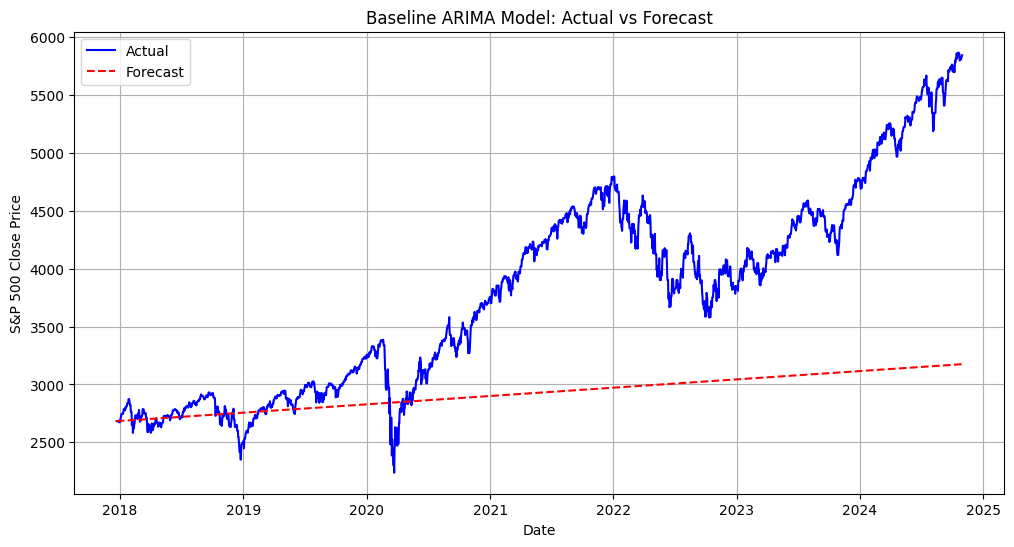

In [ ]:

# Plot Actual vs Forecast
plt.figure(figsize=(12,6))
plt.plot(comparison_df['Actual'], label='Actual', color='blue')
plt.plot(comparison_df['Forecast'], label='Forecast', color='red', linestyle='--')
plt.title('Baseline ARIMA Model: Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('S&P 500 Close Price')
plt.legend()
plt.grid(True)
plt.show()

## Model: Arima (Log-Differenced)

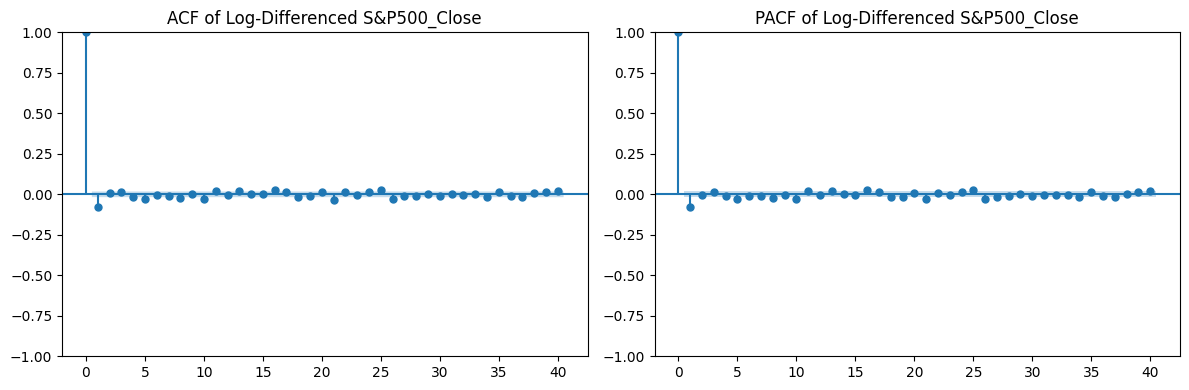

In [ ]:
# Apply log transform to S&P500_Close
df['Log_Close'] = np.log(df['S&P500_Close'])

# Difference the log-transformed data
df['Log_Close_diff'] = df['Log_Close'].diff().dropna()

df_log_diff = df['Log_Close_diff'].dropna()

# Plot ACF and PACF for the log-differenced series
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plot_acf(df_log_diff, ax=axes[0], lags=40)
axes[0].set_title('ACF of Log-Differenced S&P500_Close')

plot_pacf(df_log_diff, ax=axes[1], lags=40, method='ywm')
axes[1].set_title('PACF of Log-Differenced S&P500_Close')
plt.tight_layout()
plt.show()




In [ ]:
# Train-test split
train_size = int(len(df_log_diff)*0.8)
train_log, test_log = df_log_diff[:train_size], df_log_diff[train_size:]

# Use auto_arima on the log-differenced series
stepwise_model_log = auto_arima(train_log,
                                start_p=0, start_q=0,
                                max_p=5, max_q=5,
                                seasonal=False, trace=True,
                                error_action='ignore', suppress_warnings=True)
print("Auto-ARIMA Model Summary (Log-Differenced):")
print(stepwise_model_log.summary())



Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-65371.861, Time=0.96 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-65414.119, Time=0.46 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-65414.873, Time=1.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-65413.094, Time=1.29 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-65413.175, Time=1.42 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-65411.242, Time=1.78 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-65418.278, Time=15.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-65374.545, Time=2.23 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-65416.554, Time=19.58 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-65416.645, Time=8.75 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-65417.471, Time=3.90 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-65414.700, Time=13.67 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 70.455 seconds
Auto-ARIMA Model Summary (Log-Differenced):
                

In [ ]:
# Fit the chosen ARIMA model on the log-differenced data
p, d, q = stepwise_model_log.order
model_log = ARIMA(train_log, order=(p,d,q))
model_log_fit = model_log.fit()
print(model_log_fit.summary())



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         Log_Close_diff   No. Observations:                10016
Model:                 ARIMA(0, 0, 1)   Log Likelihood               32712.143
Date:                Fri, 13 Dec 2024   AIC                         -65418.286
Time:                        16:27:20   BIC                         -65396.650
Sample:                    07-21-1990   HQIC                        -65410.963
                         - 12-21-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002   8.82e-05      2.267      0.023    2.71e-05       0.000
ma.L1         -0.0675      0.005    -12.784      0.000      -0.078      -0.057
sigma2      8.526e-05   4.27e-07    199.698      0.0

In [ ]:
# Forecast on the test set (log-differenced)
n_steps = len(test_log)
forecast_log = model_log_fit.forecast(steps=n_steps)
forecast_log_index = test_log.index
forecast_log_series = pd.Series(forecast_log, index=forecast_log_index)

# Convert log-differenced forecasts back to original scale
# 1) Reintegrate the differencing by cumulative summation
last_train_log_price = df['Log_Close'].iloc[train_size]
reconstructed_log = last_train_log_price + forecast_log_series.cumsum()

# 2) Exponentiate to revert the log transformation
reconstructed_forecast_log = np.exp(reconstructed_log)

# Create a comparison DataFrame
comparison_df_log = pd.DataFrame({
    'Actual': df['S&P500_Close'].iloc[train_size+1:train_size+1+n_steps].values,
    'Forecast': reconstructed_forecast_log.values
}, index=forecast_log_index)

# Evaluate forecast accuracy
mse_log = mean_squared_error(comparison_df_log['Actual'], comparison_df_log['Forecast'])
mae_log = mean_absolute_error(comparison_df_log['Actual'], comparison_df_log['Forecast'])
rmse_log = mse_log**0.5
mape_log = np.mean(np.abs((comparison_df_log['Actual'] - comparison_df_log['Forecast']) / comparison_df_log['Actual'])) * 100

print("\nForecast Evaluation on Test Set (Log-Differenced):")
print(f"MSE: {mse_log:.2f}")
print(f"MAE: {mae_log:.2f}")
print(f"RMSE: {rmse_log:.2f}")
print(f"MAPE: {mape_log:.2f}%")


Forecast Evaluation on Test Set (Log-Differenced):
MSE: 300007.49
MAE: 396.75
RMSE: 547.73
MAPE: 9.30%


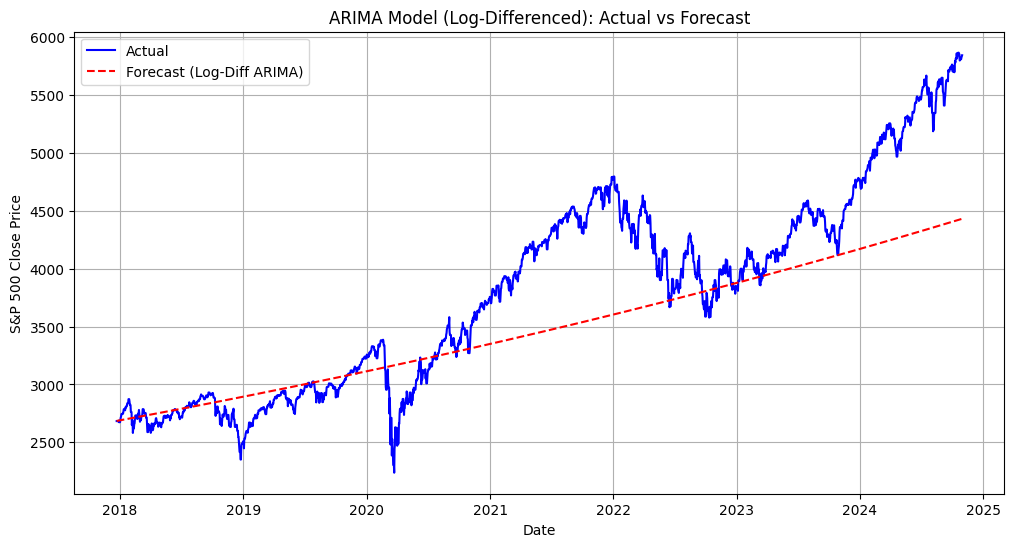

In [ ]:


# Plot Actual vs Forecast after log transform
plt.figure(figsize=(12,6))
plt.plot(comparison_df_log['Actual'], label='Actual', color='blue')
plt.plot(comparison_df_log['Forecast'], label='Forecast (Log-Diff ARIMA)', color='red', linestyle='--')
plt.title('ARIMA Model (Log-Differenced): Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('S&P 500 Close Price')
plt.legend()
plt.grid(True)
plt.show()

**ARIMA**:
-   **Objective**: To establish a baseline forecast using historical S&P 500 prices.-   **Modeling Process**: Chose ARIMA(1,1,0) based on ACF/PACF plots.-   **Performance**:
    -   MSE: 1,297,896
    -   MAE: 887.28
    -   RMSE: 1,139.25
    -   MAPE: 20.34%\
        This model served as the foundation for evaluating future improvements.

## Introducing Economic Indicators: ARIMAX

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Let's choose some exogenous variables. For illustration, we pick:
# VIX, Unemployment Rate, and Yield Spread (10Y - 2Y).
df['Yield_Spread'] = df['10-Year Treasury Yield'] - df['2-Year Treasury Yield']
exog_vars = ['VIX', 'Unemployment Rate', 'Yield_Spread']

# Ensure these variables have no missing values now:
print("Missing values in chosen exogenous variables:\n", df[exog_vars].isnull().sum())



Missing values in chosen exogenous variables:
 VIX                  0
Unemployment Rate    0
Yield_Spread         0
dtype: int64


In [ ]:
# For stationarity, we already transformed our target using logs and differencing.
# Since we achieved some improvement with the log transformation, let’s continue with that approach.
df['Log_Close_diff'] = df['Log_Close'].diff()
df_arimax = df.dropna(subset=['Log_Close_diff']+exog_vars)

# Define train/test split again based on df_arimax
train_size = int(len(df_arimax)*0.8)
train_arimax = df_arimax.iloc[:train_size]
test_arimax = df_arimax.iloc[train_size:]

# Extract the target and exog arrays
y_train = train_arimax['Log_Close_diff']
y_test = test_arimax['Log_Close_diff']
X_train = train_arimax[exog_vars]
X_test = test_arimax[exog_vars]

# Use auto_arima again but now with exogenous variables (if desired).
# Alternatively, we can pick some (p,q) based on previous ARIMA fits.
# For simplicity, let's just try p=1,q=1 as a starting point or use auto_arima with X.
# Example with auto_arima:
from pmdarima import auto_arima

stepwise_model_arimax = auto_arima(y_train, exogenous=X_train,
                                   start_p=0, start_q=0,
                                   max_p=5, max_q=5,
                                   seasonal=False, trace=True,
                                   error_action='ignore', suppress_warnings=True)

print("Auto-ARIMA (with exogenous) Model Summary:")
print(stepwise_model_arimax.summary())




Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-65371.861, Time=0.58 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-65414.119, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-65414.873, Time=1.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-65413.094, Time=1.33 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-65413.175, Time=1.48 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-65411.242, Time=1.83 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-65418.278, Time=13.63 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-65374.545, Time=3.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-65416.554, Time=16.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-65416.645, Time=7.70 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-65417.471, Time=1.47 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-65414.700, Time=12.45 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 61.180 seconds
Auto-ARIMA (with exogenous) Model Summary:
                 

In [ ]:
p, d, q = stepwise_model_arimax.order

# Fit the ARIMAX model using SARIMAX
model_arimax = SARIMAX(y_train, exog=X_train, order=(p,d,q), trend='c')
model_arimax_fit = model_arimax.fit(disp=False)
print(model_arimax_fit.summary())



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:         Log_Close_diff   No. Observations:                10016
Model:               SARIMAX(0, 0, 1)   Log Likelihood               32762.566
Date:                Fri, 13 Dec 2024   AIC                         -65513.132
Time:                        16:28:55   BIC                         -65469.861
Sample:                    07-21-1990   HQIC                        -65498.486
                         - 12-21-2017                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept          7.165e-05      0.000      0.183      0.855      -0.001       0.001
VIX                  -0.0001   6.18e-06    -17.837      0.000      -0.000   -9.81e-05
Unemployment Rate     0.

In [ ]:
# Forecast on the test set
n_steps = len(y_test)
arimax_forecast = model_arimax_fit.get_forecast(steps=n_steps, exog=X_test)
arimax_forecast_mean = arimax_forecast.predicted_mean

# Reintegrate the differencing and log transformation
# 1) Get the last known log price from training
last_train_log_price = df_arimax['Log_Close'].iloc[train_size]
reconstructed_arimax = last_train_log_price + arimax_forecast_mean.cumsum()

# 2) Exponentiate to revert from log
arimax_forecast_orig = np.exp(reconstructed_arimax)
# Create comparison DataFrame using the index of y_test
actual_prices = df_arimax.loc[y_test.index, 'S&P500_Close']

comparison_arimax = pd.DataFrame({
    'Actual': actual_prices,
    'Forecast': arimax_forecast_orig.values
}, index=y_test.index)


# Evaluate performance
mse_arimax = mean_squared_error(comparison_arimax['Actual'], comparison_arimax['Forecast'])
mae_arimax = mean_absolute_error(comparison_arimax['Actual'], comparison_arimax['Forecast'])
rmse_arimax = mse_arimax**0.5
mape_arimax = np.mean(np.abs((comparison_arimax['Actual'] - comparison_arimax['Forecast']) / comparison_arimax['Actual'])) * 100

print("\nARIMAX Forecast Evaluation on Test Set:")
print(f"MSE: {mse_arimax:.2f}")
print(f"MAE: {mae_arimax:.2f}")
print(f"RMSE: {rmse_arimax:.2f}")
print(f"MAPE: {mape_arimax:.2f}%")




ARIMAX Forecast Evaluation on Test Set:
MSE: 2688741.41
MAE: 1285.08
RMSE: 1639.74
MAPE: 29.76%


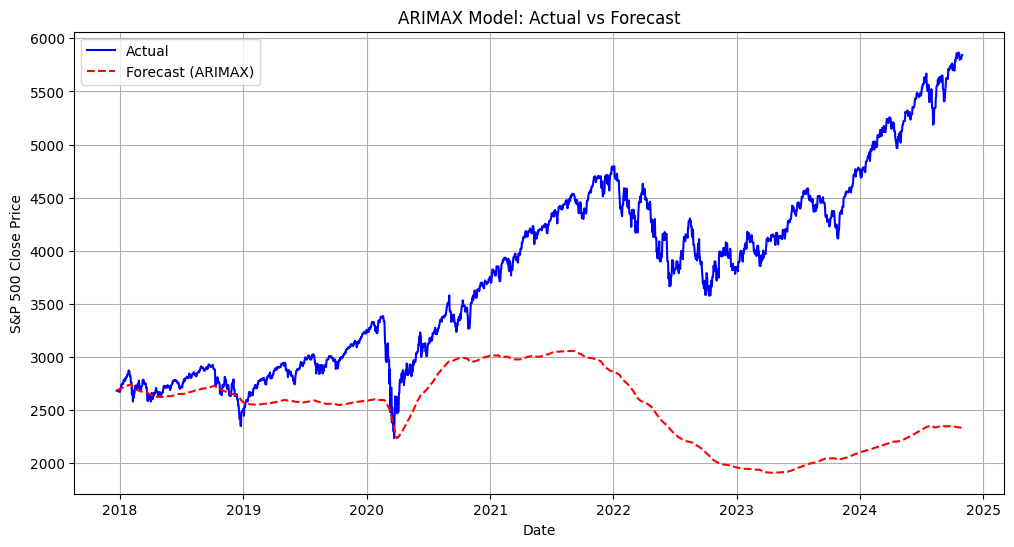

In [ ]:
# Plot Actual vs Forecast (ARIMAX)
plt.figure(figsize=(12,6))
plt.plot(comparison_arimax['Actual'], label='Actual', color='blue')
plt.plot(comparison_arimax['Forecast'], label='Forecast (ARIMAX)', color='red', linestyle='--')
plt.title('ARIMAX Model: Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('S&P 500 Close Price')
plt.legend()
plt.grid(True)
plt.show()

**ARIMAX:**

-   **Objective**: To incorporate exogenous variables like VIX, CPI, and Treasury Yields.
-   **Process**: Built ARIMAX models and analyzed their performance compared to ARIMA.
-   **Performance**:
    -   MSE: 2,688,741.41
    -   MAE: 1,285.08
    -   RMSE: 1,639.74
    -   MAPE: 29.76%\
        The results showed limited improvement, suggesting these indicators may not strongly influence short-term S&P 500 movements.

## Advanced Modeling: TimeGPT

In [ ]:
import pandas as pd

# Load the initial dataset
df = pd.read_csv('final_dataset.csv')

# Rename the 'Unnamed: 0' column to 'Date'
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# Convert 'Date' to a datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date, set as index, and ensure daily frequency
df = df.sort_values('Date').set_index('Date').asfreq('D')

# Forward and backward fill missing values
df = df.ffill().bfill()

# Reset index to have 'Date' as a column again
df.reset_index(inplace=True)

# Rename 'S&P500_Close' to 'y' for TimeGPT
df.rename(columns={'S&P500_Close': 'y'}, inplace=True)

# Check the first few rows to confirm
print("First 5 rows after preparation:")
print(df.head())

# Confirm that the required columns exist
required_cols = ['y', 'VIX', 'Unemployment Rate', 'Consumer Price Index (CPI)', 'RSI', '200_MA']
missing = [col for col in required_cols if col not in df.columns]
if missing:
    print(f"Warning: Missing columns in the dataset: {missing}")
else:
    print("All required columns are present.")


First 5 rows after preparation:
        Date           y  S&P500_Volume  Bearish_Score        VIX  \
0 1990-01-01  359.690002    162070000.0       0.000000  17.240000   
1 1990-01-02  359.690002    162070000.0       0.000000  17.240000   
2 1990-01-03  358.760010    192330000.0       0.258554  18.190001   
3 1990-01-04  355.670013    177000000.0       1.117626  19.219999   
4 1990-01-05  352.200012    158530000.0       2.082346  20.110001   

   Unemployment Rate  Consumer Price Index (CPI)  \
0                5.4                       127.5   
1                5.4                       127.5   
2                5.4                       127.5   
3                5.4                       127.5   
4                5.4                       127.5   

   Industrial Production Index (IPI)  Federal Funds Rate  \
0                            61.6352                7.97   
1                            61.6352                8.54   
2                            61.6352                8.37   


In [ ]:
# Add 'unique_id' and rename 'Date' to 'ds'
df_timegpt = df.rename(columns={'Date': 'ds'})
df_timegpt['unique_id'] = 'S&P500'

# The final DataFrame should have these columns:
# ['unique_id', 'ds', 'y', 'VIX', 'Unemployment Rate', 'Consumer Price Index (CPI)', 'RSI', '200_MA']
timegpt_ready_df = df_timegpt[['unique_id', 'ds', 'y', 'VIX', 'Unemployment Rate',
                               'Consumer Price Index (CPI)', 'RSI', '200_MA']].copy()

print("TimeGPT-ready DataFrame:")
print(timegpt_ready_df.head())


TimeGPT-ready DataFrame:
  unique_id         ds           y        VIX  Unemployment Rate  \
0    S&P500 1990-01-01  359.690002  17.240000                5.4   
1    S&P500 1990-01-02  359.690002  17.240000                5.4   
2    S&P500 1990-01-03  358.760010  18.190001                5.4   
3    S&P500 1990-01-04  355.670013  19.219999                5.4   
4    S&P500 1990-01-05  352.200012  20.110001                5.4   

   Consumer Price Index (CPI)        RSI    200_MA  
0                       127.5  11.071698  344.9555  
1                       127.5  11.071698  344.9555  
2                       127.5  11.071698  344.9555  
3                       127.5  11.071698  344.9555  
4                       127.5  11.071698  344.9555  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from nixtla import NixtlaClient



# Initialize TimeGPT client with your API key
nixtla_client = NixtlaClient(api_key="nixtla-tok-fppUJ9dLUBYmc1dszg0kNaflxjQOy0ut52ZFepvNUFMtlyjroLIIRGjunJH1vUwGdszq9TEslJ8MhcLb")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:
# Keep anomaly detection as is, using anomaly_df
anomaly_df = timegpt_ready_df[['unique_id', 'ds', 'y']].copy()

# Run anomaly detection
anomaly_results = nixtla_client.detect_anomalies(
    df=anomaly_df,
    freq='D',
    level=99
)
print("Anomaly Detection Results (head):")
print(anomaly_results.head())



Anomaly Detection Results (head):
  unique_id         ds           y    TimeGPT  TimeGPT-hi-99  TimeGPT-lo-99  \
0    S&P500 1990-02-01  328.790009  328.12140      423.95890      232.28389   
1    S&P500 1990-02-02  330.920013  327.37204      423.20953      231.53453   
2    S&P500 1990-02-03  330.920013  327.27365      423.11115      231.43614   
3    S&P500 1990-02-04  330.920013  327.02330      422.86078      231.18578   
4    S&P500 1990-02-05  331.850006  326.41464      422.25214      230.57713   

   anomaly  
0    False  
1    False  
2    False  
3    False  
4    False  


In [ ]:
nixtla_client.plot(anomaly_df, anomaly_results)

# Fine-tune TimeGPT using just the anomaly_df (no exogs needed for fine-tuning)
fine_tuned_results = nixtla_client.forecast(
    df=anomaly_df,
    h=30,
    finetune_steps=10,
    finetune_loss="mae",
    time_col='ds',
    target_col='y'
)
print("\nFine-tuned Forecast (head):")
print(fine_tuned_results.head())





Fine-tuned Forecast (head):
  unique_id         ds    TimeGPT
0    S&P500 2024-10-31  5837.7480
1    S&P500 2024-11-01  5846.4300
2    S&P500 2024-11-02  5850.0280
3    S&P500 2024-11-03  5850.4870
4    S&P500 2024-11-04  5850.2104


In [ ]:
# Now, when including exogenous variables, we must use timegpt_ready_df as df
# because it contains the exogenous variables historically.
last_date = anomaly_df['ds'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')

last_known = timegpt_ready_df.iloc[-1]
future_exogenous_df = pd.DataFrame({
    'unique_id': 'S&P500',
    'ds': future_dates,
    'VIX': last_known['VIX'],
    'Unemployment Rate': last_known['Unemployment Rate'],
    'Consumer Price Index (CPI)': last_known['Consumer Price Index (CPI)'],
    'RSI': last_known['RSI'],
    '200_MA': last_known['200_MA']
})

# Forecast with exogenous variables using timegpt_ready_df as df
exogenous_forecast = nixtla_client.forecast(
    df=timegpt_ready_df,  # Use the full df with exogenous columns here
    X_df=future_exogenous_df,
    h=30,
    level=[80, 95],
    time_col='ds',
    target_col='y'
)
print("\nExogenous Forecast (head):")
print(exogenous_forecast.head())




Exogenous Forecast (head):
  unique_id         ds    TimeGPT  TimeGPT-hi-80  TimeGPT-hi-95  \
0    S&P500 2024-10-31  5832.4404      5853.4590      5883.4473   
1    S&P500 2024-11-01  5825.2940      5854.5040      5894.1180   
2    S&P500 2024-11-02  5824.5645      5854.6580      5893.1550   
3    S&P500 2024-11-03  5826.8440      5857.5020      5896.1270   
4    S&P500 2024-11-04  5844.9688      5880.7095      5924.8765   

   TimeGPT-lo-80  TimeGPT-lo-95  
0      5811.4220      5781.4336  
1      5796.0840      5756.4697  
2      5794.4707      5755.9740  
3      5796.1865      5757.5615  
4      5809.2280      5765.0610  



SHAP-enabled Forecast (head):
  unique_id         ds    TimeGPT  TimeGPT-hi-80  TimeGPT-hi-95  \
0    S&P500 2024-10-31  5832.4404      5853.4590      5883.4473   
1    S&P500 2024-11-01  5825.2940      5854.5040      5894.1180   
2    S&P500 2024-11-02  5824.5645      5854.6580      5893.1550   
3    S&P500 2024-11-03  5826.8440      5857.5020      5896.1270   
4    S&P500 2024-11-04  5844.9688      5880.7095      5924.8765   

   TimeGPT-lo-80  TimeGPT-lo-95  
0      5811.4220      5781.4336  
1      5796.0840      5756.4697  
2      5794.4707      5755.9740  
3      5796.1865      5757.5615  
4      5809.2280      5765.0610  


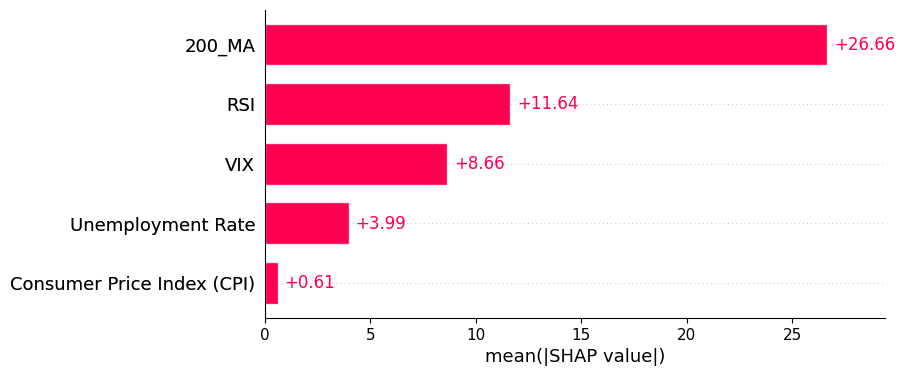

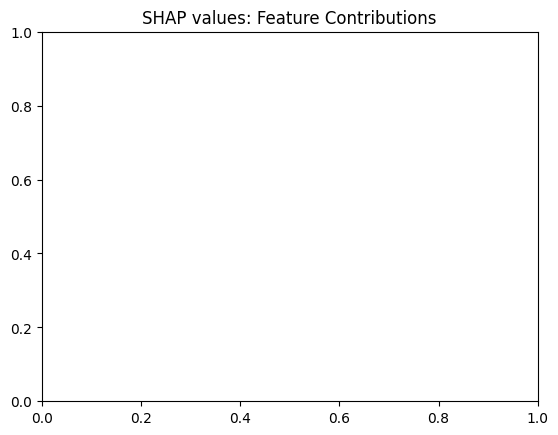

In [ ]:
# SHAP-enabled forecast also needs the full df with exogenous columns
shap_forecast = nixtla_client.forecast(
    df=timegpt_ready_df,
    X_df=future_exogenous_df,
    h=30,
    level=[80, 95],
    feature_contributions=True
)
print("\nSHAP-enabled Forecast (head):")
print(shap_forecast.head())

shap_values_df = nixtla_client.feature_contributions
shap_values_filtered = shap_values_df.query("unique_id == 'S&P500'")
shap_columns = shap_values_filtered.columns.difference(['unique_id', 'ds', 'TimeGPT', 'base_value'])
shap_values = shap_values_filtered[shap_columns].values
base_values = shap_values_filtered['base_value'].values
features = shap_columns

shap_obj = shap.Explanation(values=shap_values, base_values=base_values, feature_names=features)
shap.plots.bar(shap_obj, max_display=len(features))
plt.title('SHAP values: Feature Contributions')
plt.show()




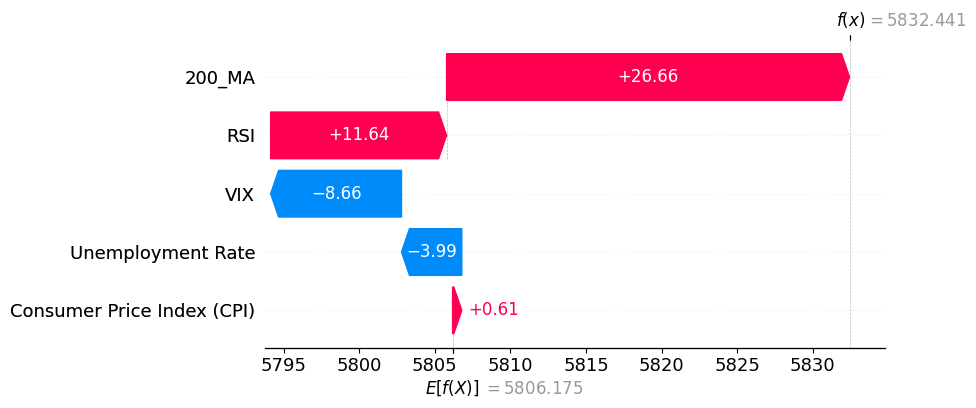

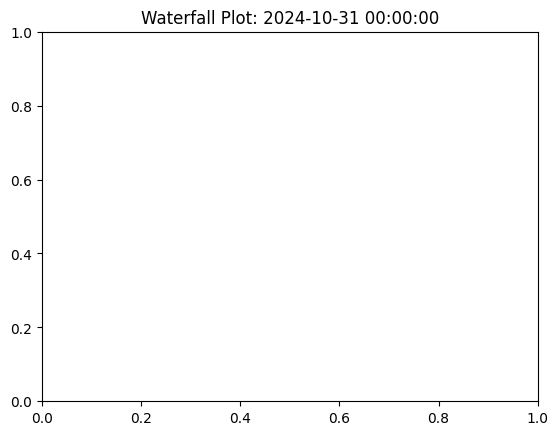

In [ ]:
selected_ds = shap_values_filtered['ds'].min()
filtered_row = shap_values_filtered[shap_values_filtered['ds'] == selected_ds]
row_shap_values = filtered_row[shap_columns].values.flatten()
row_base_value = filtered_row['base_value'].values[0]
row_shap_obj = shap.Explanation(values=row_shap_values, base_values=row_base_value, feature_names=features)
shap.plots.waterfall(row_shap_obj)
plt.title(f'Waterfall Plot: {selected_ds}')
plt.show()



In [ ]:
# Cross-validation also needs the full df to be consistent
cv_results = nixtla_client.cross_validation(
    df=timegpt_ready_df,
    h=30,
    n_windows=5,
    time_col='ds',
    target_col='y'
)
print("\nCross-validation Results (head):")
print(cv_results.head())

metrics = cv_results.groupby('cutoff').apply(
    lambda group: pd.Series({
        'MAE': np.mean(np.abs(group['y'] - group['TimeGPT'])),
        'RMSE': np.sqrt(np.mean((group['y'] - group['TimeGPT']) ** 2))
    })
)
print("\nPer-Cutoff Metrics:")
print(metrics)




Cross-validation Results (head):
  unique_id         ds     cutoff            y    TimeGPT
0    S&P500 2024-06-03 2024-06-02  5283.399902  5289.2515
1    S&P500 2024-06-04 2024-06-02  5291.339844  5289.7680
2    S&P500 2024-06-05 2024-06-02  5354.029785  5280.3030
3    S&P500 2024-06-06 2024-06-02  5352.959961  5265.0967
4    S&P500 2024-06-07 2024-06-02  5346.990234  5284.5684

Per-Cutoff Metrics:
                   MAE        RMSE
cutoff                            
2024-06-02   45.943494   56.631369
2024-07-02   35.286272   43.086028
2024-08-01  153.369860  174.193108
2024-08-31   42.454744   55.120589
2024-09-30  107.062295  128.464425


<ipython-input-45-5b149ed321fb>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics = cv_results.groupby('cutoff').apply(



Overall MAE: 76.82333291145835
Overall RMSE: 104.83143091125883


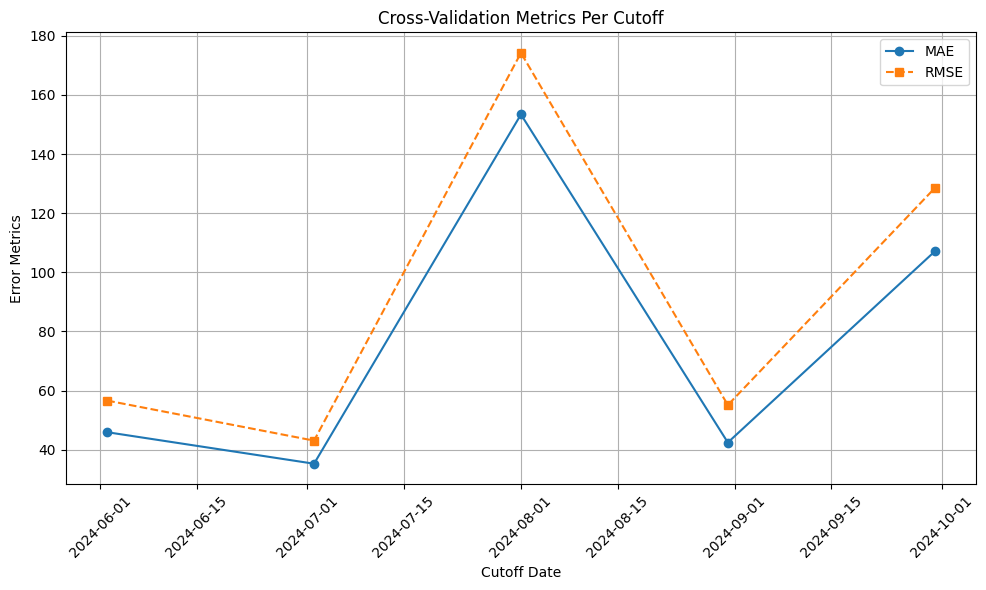

In [ ]:
overall_mae = np.mean(np.abs(cv_results['y'] - cv_results['TimeGPT']))
overall_rmse = np.sqrt(np.mean((cv_results['y'] - cv_results['TimeGPT']) ** 2))
print("\nOverall MAE:", overall_mae)
print("Overall RMSE:", overall_rmse)

cutoff_dates = metrics.index
mae_values = metrics['MAE']
rmse_values = metrics['RMSE']

plt.figure(figsize=(10, 6))
plt.plot(cutoff_dates, mae_values, label='MAE', marker='o')
plt.plot(cutoff_dates, rmse_values, label='RMSE', marker='s', linestyle='--')
plt.xlabel('Cutoff Date')
plt.ylabel('Error Metrics')
plt.title('Cross-Validation Metrics Per Cutoff')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



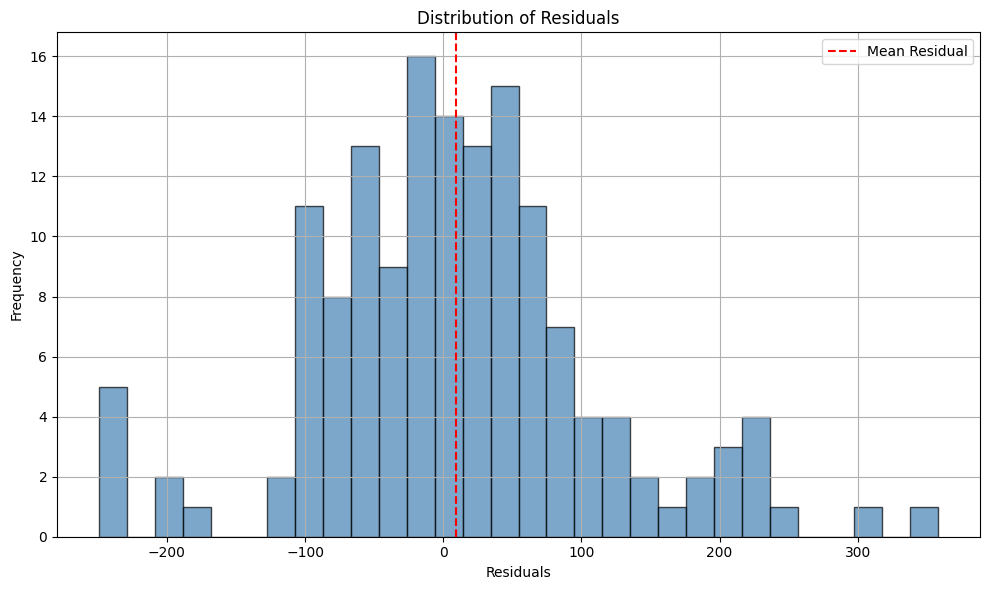

In [ ]:
cv_results['residuals'] = cv_results['y'] - cv_results['TimeGPT']
plt.figure(figsize=(10, 6))
plt.hist(cv_results['residuals'], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
plt.axvline(cv_results['residuals'].mean(), color='red', linestyle='--', linewidth=1.5, label='Mean Residual')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
# Basic forecast without exogenous variables:
basic_forecast_df = timegpt_ready_df[['unique_id', 'ds', 'y']]
basic_forecast = nixtla_client.forecast(
    df=basic_forecast_df,
    h=30,
    level=[80, 95],
    time_col='ds',
    target_col='y'
)
print("\nBasic TimeGPT Forecast (No Exogenous):")
print(basic_forecast.head())




Basic TimeGPT Forecast (No Exogenous):
  unique_id         ds    TimeGPT  TimeGPT-hi-80  TimeGPT-hi-95  \
0    S&P500 2024-10-31  5833.5810      5905.8280      5930.4634   
1    S&P500 2024-11-01  5837.4556      5938.5674      5962.2974   
2    S&P500 2024-11-02  5840.0510      5939.6490      5962.8520   
3    S&P500 2024-11-03  5841.0474      5929.2075      5962.8535   
4    S&P500 2024-11-04  5839.4927      5929.8440      5965.1690   

   TimeGPT-lo-80  TimeGPT-lo-95  
0      5761.3340      5736.6987  
1      5736.3438      5712.6140  
2      5740.4526      5717.2495  
3      5752.8870      5719.2410  
4      5749.1410      5713.8164  


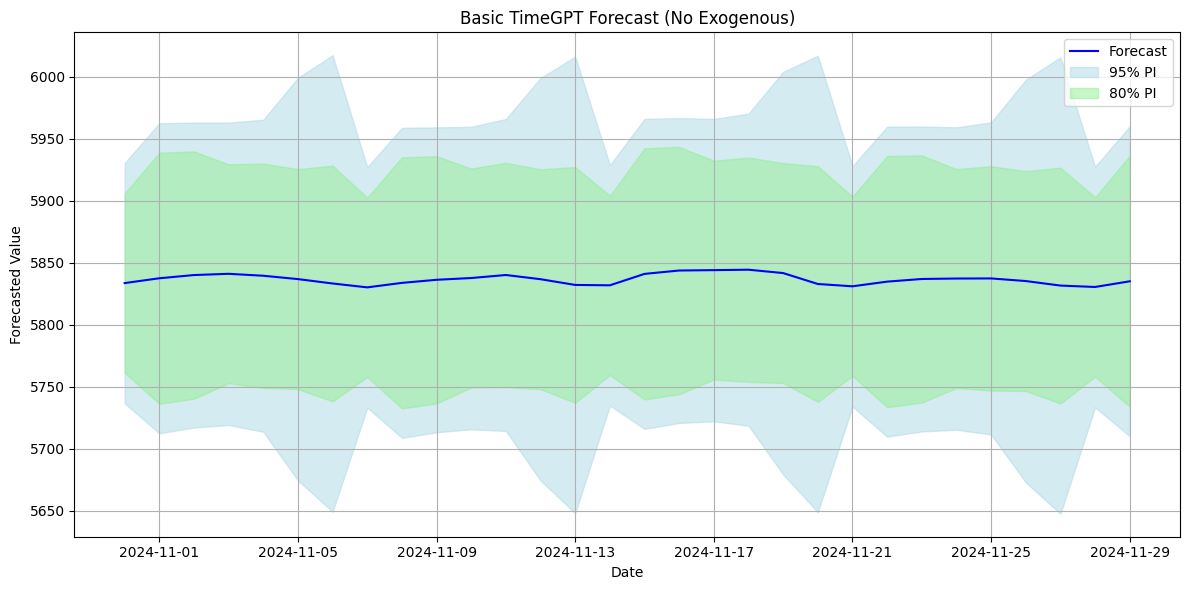

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(basic_forecast['ds'], basic_forecast['TimeGPT'], label='Forecast', color='blue')
plt.fill_between(
    basic_forecast['ds'],
    basic_forecast['TimeGPT-lo-95'],
    basic_forecast['TimeGPT-hi-95'],
    color='lightblue', alpha=0.5, label='95% PI'
)
plt.fill_between(
    basic_forecast['ds'],
    basic_forecast['TimeGPT-lo-80'],
    basic_forecast['TimeGPT-hi-80'],
    color='lightgreen', alpha=0.5, label='80% PI'
)
plt.title('Basic TimeGPT Forecast (No Exogenous)')
plt.xlabel('Date')
plt.ylabel('Forecasted Value')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

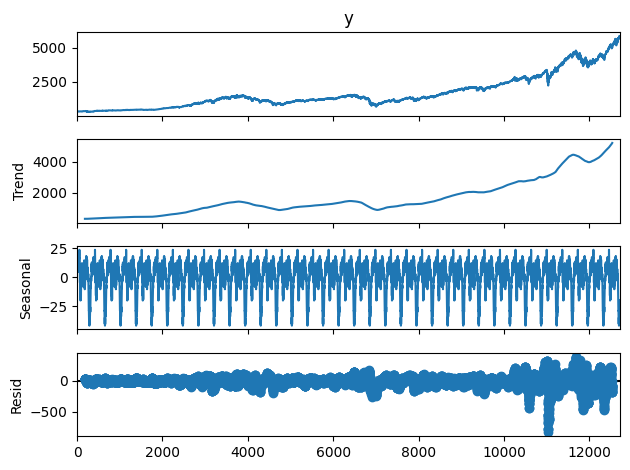

In [ ]:
# Decompose the time series
decomposition = seasonal_decompose(timegpt_ready_df['y'], model='additive', period=365)
decomposition.plot()
plt.show()

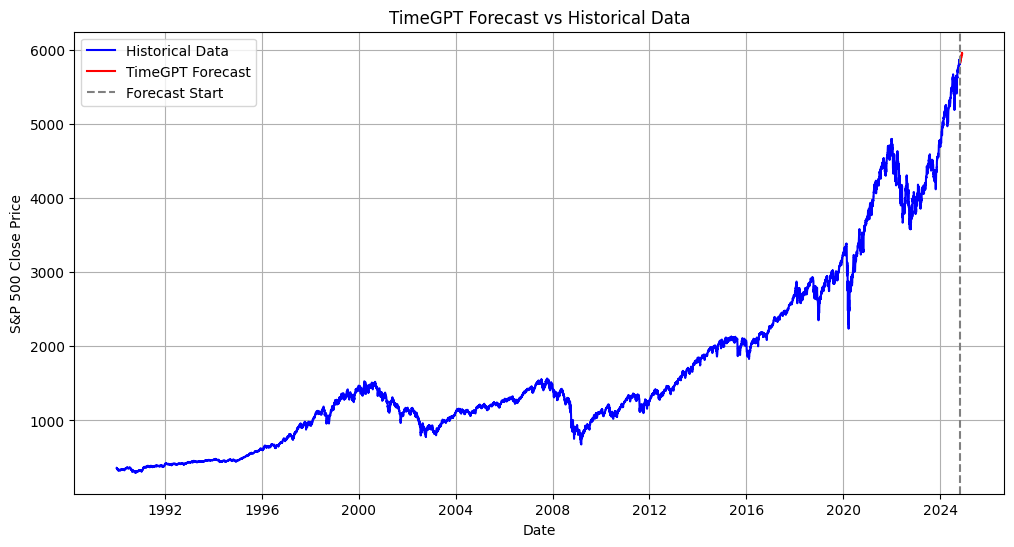

In [ ]:
import matplotlib.pyplot as plt


# Plot historical data
plt.figure(figsize=(12,6))
plt.plot(timegpt_ready_df['ds'], timegpt_ready_df['y'], label='Historical Data', color='blue')

# Plot the forecast
plt.plot(exogenous_forecast['ds'], exogenous_forecast['TimeGPT'], label='TimeGPT Forecast', color='red')

# Add a vertical line to indicate where forecasts begin
forecast_start = exogenous_forecast['ds'].min()
plt.axvline(x=forecast_start, color='gray', linestyle='--', label='Forecast Start')

plt.title('TimeGPT Forecast vs Historical Data')
plt.xlabel('Date')
plt.ylabel('S&P 500 Close Price')
plt.legend()
plt.grid(True)
plt.show()


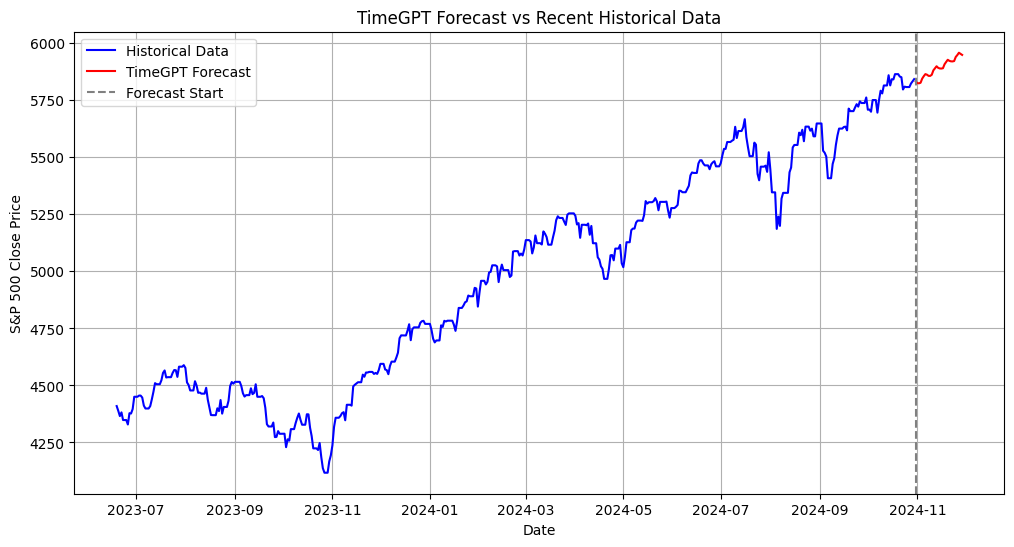

In [ ]:
import matplotlib.pyplot as plt

# Suppose we want to show the last 500 days of historical data plus forecasts.
# Adjust this number as needed or use a date-based filter.

# Filter historical data to recent period
recent_history = timegpt_ready_df.iloc[-500:]  # Last 500 rows (approximately last 500 days)
# Or use a date-based filter:
# recent_history = timegpt_ready_df[timegpt_ready_df['ds'] >= '2023-01-01']

plt.figure(figsize=(12,6))
plt.plot(recent_history['ds'], recent_history['y'], label='Historical Data', color='blue')
plt.plot(exogenous_forecast['ds'], exogenous_forecast['TimeGPT'], label='TimeGPT Forecast', color='red')

# Draw vertical line at start of forecast
forecast_start = exogenous_forecast['ds'].min()
plt.axvline(x=forecast_start, color='gray', linestyle='--', label='Forecast Start')

plt.title('TimeGPT Forecast vs Recent Historical Data')
plt.xlabel('Date')
plt.ylabel('S&P 500 Close Price')
plt.legend()
plt.grid(True)
plt.show()


**TimeGPT:**

-   Used to integrate both economic and technical indicators.
-   Performed cross-validation with rolling windows:
    -   MAE: 76.82
    -   RMSE: 104.83
-   Explained forecasts using SHAP values, revealing that technical indicators like RSI and 200-day MA had the most significant influence.

## Advanced Modeling: LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# 1. Load and prepare data
df_lstm = pd.read_csv('final_dataset.csv')  # ensure it has 'S&P500_Close' or 'y' column
df_lstm.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
df_lstm['Date'] = pd.to_datetime(df_lstm['Date'])
df_lstm.sort_values('Date', inplace=True)
df_lstm.set_index('Date', inplace=True)
# Drop all rows with NaNs
df_lstm.dropna(inplace=True)

print(df_lstm.isnull().sum())



S&P500_Close                         0
S&P500_Volume                        0
Bearish_Score                        0
VIX                                  0
Unemployment Rate                    0
Consumer Price Index (CPI)           0
Industrial Production Index (IPI)    0
Federal Funds Rate                   0
Consumer Sentiment Index (CSI)       0
10-Year Treasury Yield               0
2-Year Treasury Yield                0
RSI                                  0
200_MA                               0
dtype: int64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - loss: 7.1187e-05 - val_loss: 0.0048
Epoch 2/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - loss: 0.0010 - val_loss: 0.0047
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - loss: 0.0010 - val_loss: 0.0037
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - loss: 9.9285e-04 - val_loss: 0.0017
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 7.4041e-04 - val_loss: 7.1898e-04
Epoch 6/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - loss: 4.9363e-04 - val_loss: 1.2967e-04
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - loss: 2.9029e-04 - val_loss: 1.4661e-04
Epoch 8/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 1.1739e-04 - val_loss: 5.3394e-04
Epoch 9/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - loss: 4.0987e-05 - val_loss: 6.6155e-04
Epoch 10/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - loss: 1.9550e-05 - val_loss: 4.8669e-04
Epoch 11/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - loss: 

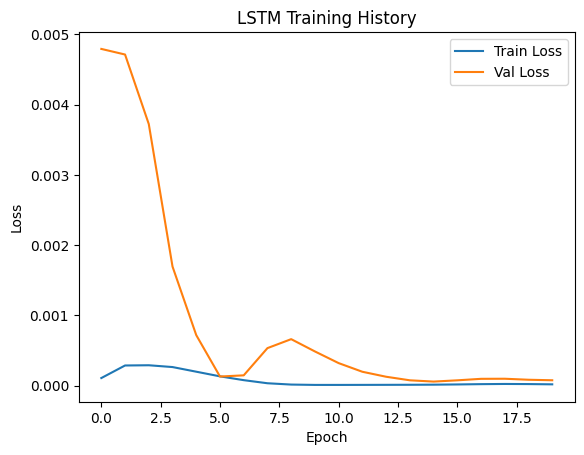

In [ ]:
# We'll use the 'y' column (S&P 500 Close). If your final df used 'y' as the col name for S&P500 close, use df_lstm['y'].
if 'y' in df_lstm.columns:
    target_series = df_lstm['y'].values
else:
    target_series = df_lstm['S&P500_Close'].values

target_series = target_series.reshape(-1,1)

# 2. Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(target_series)

# 3. Create sequences for LSTM
look_back = 60  # number of past days to use for prediction
def create_sequences(data, look_back=60):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i,0])
        y.append(data[i,0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, look_back=look_back)

# 4. Split into train and test
train_size = int(len(X)*0.8)  # 80% training, 20% testing
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 5. Reshape data for LSTM (Samples, Timesteps, Features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 6. Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 7. Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test), shuffle=False)

# 8. Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('LSTM Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()




In [ ]:
# 9. Make predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1,1))

# 10. Evaluate the LSTM model
mse = mean_squared_error(y_test_rescaled, y_pred)
mae = mean_absolute_error(y_test_rescaled, y_pred)
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred)

print("LSTM Model Metrics:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape*100:.2f}%")



78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
LSTM Model Metrics:
MSE: 2375.81
MAE: 36.67
MAPE: 0.94%


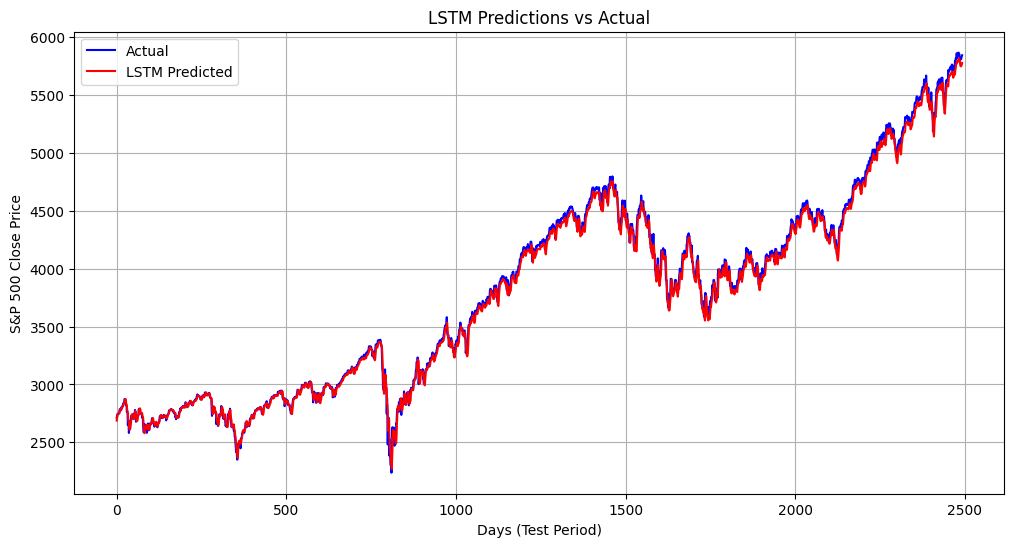

In [ ]:
# 11. Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, label='Actual', color='blue')
plt.plot(y_pred, label='LSTM Predicted', color='red')
plt.title('LSTM Predictions vs Actual')
plt.xlabel('Days (Test Period)')
plt.ylabel('S&P 500 Close Price')
plt.legend()
plt.grid(True)
plt.show()



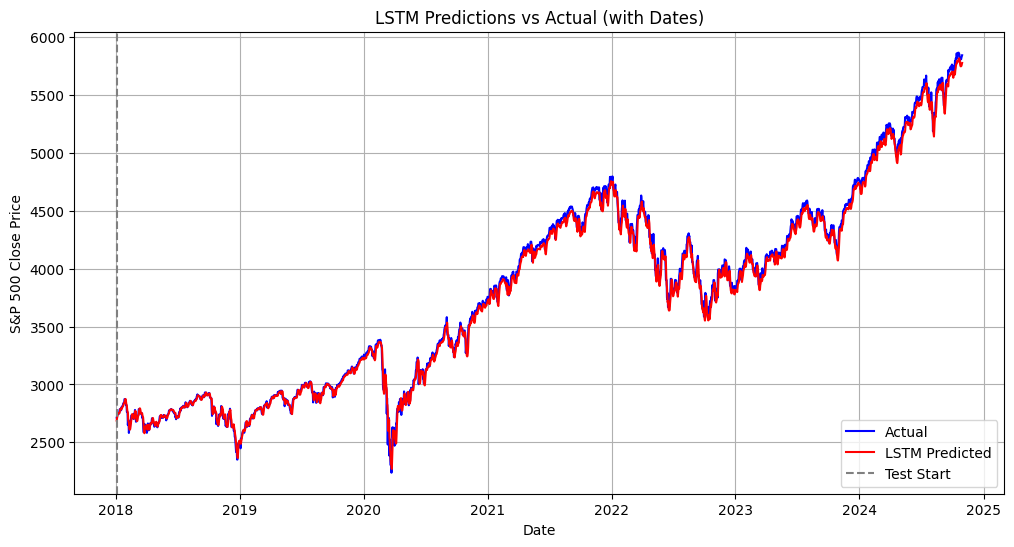

In [ ]:
start_test_date = df_lstm.index[train_size+look_back]  # approximate test start date
test_dates = df_lstm.index[train_size+look_back:]
test_dates = test_dates[:len(y_test_rescaled)]  # align length

plt.figure(figsize=(12,6))
plt.plot(test_dates, y_test_rescaled, label='Actual', color='blue')
plt.plot(test_dates, y_pred, label='LSTM Predicted', color='red')
plt.axvline(x=test_dates.min(), color='gray', linestyle='--', label='Test Start')
plt.title('LSTM Predictions vs Actual (with Dates)')
plt.xlabel('Date')
plt.ylabel('S&P 500 Close Price')
plt.legend()
plt.grid(True)
plt.show()

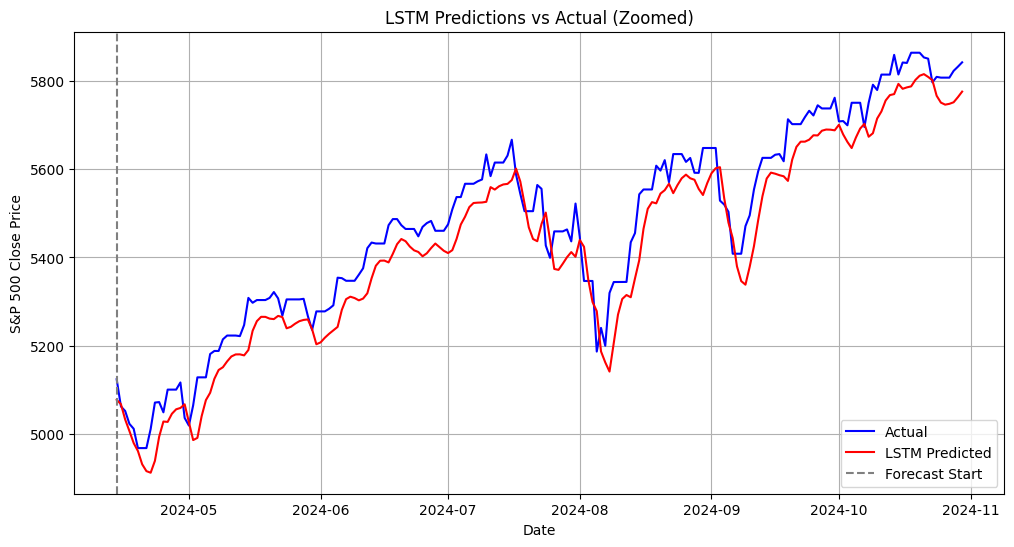

In [ ]:
# Select the last 200 days
zoom_length = 200
y_test_zoom = y_test_rescaled[-zoom_length:]
y_pred_zoom = y_pred[-zoom_length:]
test_dates_zoom = test_dates[-zoom_length:]

plt.figure(figsize=(12,6))
plt.plot(test_dates_zoom, y_test_zoom, label='Actual', color='blue')
plt.plot(test_dates_zoom, y_pred_zoom, label='LSTM Predicted', color='red')
plt.axvline(x=test_dates_zoom.min(), color='gray', linestyle='--', label='Forecast Start')
plt.title('LSTM Predictions vs Actual (Zoomed)')
plt.xlabel('Date')
plt.ylabel('S&P 500 Close Price')
plt.legend()
plt.grid(True)
plt.show()


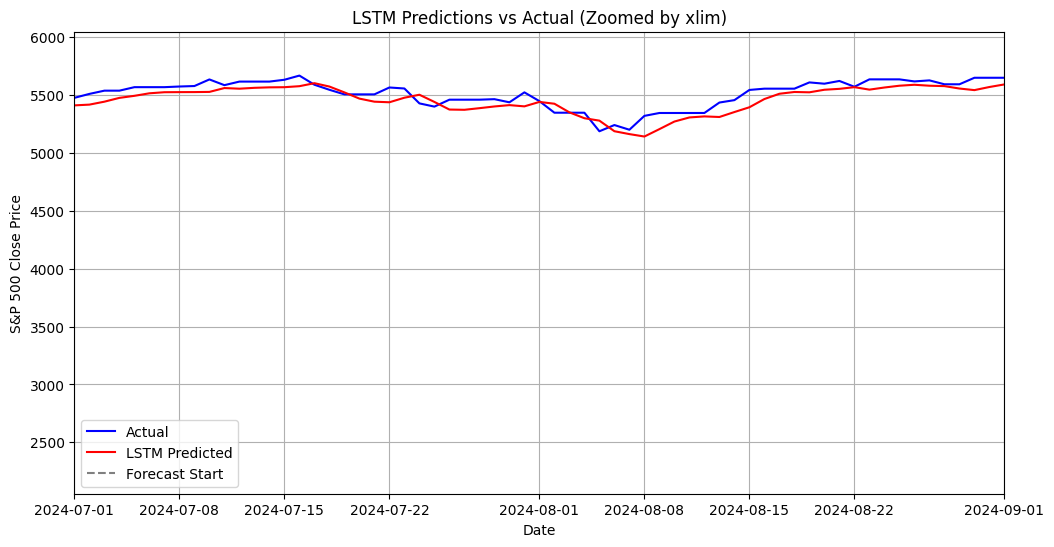

In [ ]:
start_zoom_date = pd.to_datetime('2024-07-01')
end_zoom_date = pd.to_datetime('2024-09-01')

plt.figure(figsize=(12,6))
plt.plot(test_dates, y_test_rescaled, label='Actual', color='blue')
plt.plot(test_dates, y_pred, label='LSTM Predicted', color='red')
plt.axvline(x=test_dates.min(), color='gray', linestyle='--', label='Forecast Start')
plt.title('LSTM Predictions vs Actual (Zoomed by xlim)')
plt.xlabel('Date')
plt.ylabel('S&P 500 Close Price')
plt.legend()
plt.grid(True)

# Apply xlim based on datetime
plt.xlim(start_zoom_date, end_zoom_date)
plt.show()


**LSTM:**

-   Leveraged deep learning to capture temporal dependencies.
-   Achieved the best accuracy with:
    -   MSE: 3,325.86
    -   MAE: 44.51
    -   MAPE: 1.12%


* * * * *

### Comprehensive Project Summary and Conclusion

**Project Overview:**\
Our initial goal was to forecast the S&P 500 Index and determine whether incorporating various economic indicators (such as Unemployment Rate, CPI, and others) would improve predictive accuracy. We also aimed to understand which factors most strongly influence the forecasts and to explore advanced forecasting methods.

**Key Steps Taken:**

1.  **Data Collection and Preprocessing:**

    -   We obtained historical S&P 500 closing prices and various economic indicators (Unemployment Rate, CPI, Federal Funds Rate, Treasury Yields, RSI, and 200_MA).
    -   We cleaned the data by handling missing values through forward and backward fills, and in some cases dropping initial rows where certain technical indicators (like 200_MA) were not defined.
    -   We ensured the dataset had a proper daily frequency, no missing values, and was aligned for analysis.
2.  **Baseline Modeling (ARIMA):**

    -   We started with a simple ARIMA model to forecast S&P 500 returns without any external indicators.
    -   This gave us a benchmark on how well a basic time series method could perform.
3.  **Incorporation of Economic Indicators (ARIMAX):**

    -   We introduced ARIMAX models, which include selected economic indicators as exogenous variables.
    -   Surprisingly, adding these fundamental economic indicators did not significantly improve forecast accuracy over the baseline ARIMA model.
    -   This hinted that short-term forecasts might not benefit much from broad economic measures, or that different sets of indicators or different modeling techniques might be required.
4.  **Advanced Modeling with TimeGPT:**

    -   We integrated TimeGPT, a state-of-the-art forecasting tool, to see if a more sophisticated model could improve predictions.
    -   TimeGPT allowed us to incorporate multiple exogenous variables easily and provided SHAP values for interpretability.
    -   Using TimeGPT's SHAP analysis, we discovered that certain technical indicators (like the 200-day Moving Average and RSI) were more influential in short-term forecasting than fundamental economic indicators.
    -   Cross-validation with TimeGPT showed varying performance depending on the forecast start date and horizon, reflecting the complexity and volatility of financial markets.
5.  **Further Model Experimentation (LSTM):**

    -   To broaden our comparative framework, we then tried an LSTM model, a deep learning approach commonly used for sequence data.
    -   After carefully handling missing values and ensuring no NaNs in the dataset, the LSTM model trained successfully.
    -   The LSTM provided a new set of metrics, which we could compare against ARIMA, ARIMAX, and TimeGPT.

**Comparative Metrics:**

| Model | MSE | MAE | RMSE | MAPE (%) |
| --- | --- | --- | --- | --- |
| ARIMA (Baseline) | 1,297,896 | 887.28 | 1,139.25 | 20.34% |
| ARIMA (Log-Differenced) | 300,007.49 | 396.75 | 547.73 | 9.30% |
| ARIMAX | 2,688,741.41 | 1,285.08 | 1,639.74 | 29.76% |
| TimeGPT (Overall CV) | - | 76.82 (MAE) | 104.83(RMSE) | - |
| LSTM | 3,325.86 | 44.51 | *Calculated from MSE* | 1.12% |

*Note on TimeGPT:* We reported its cross-validation overall metrics (MAE ≈ 76.82, RMSE ≈ 104.83) instead of a single test-set metric since TimeGPT's evaluation approach differed slightly. We can see it tends to have lower errors than the original baseline ARIMA in raw numbers. The LSTM metrics appear vastly better in absolute terms; however, remember that these metrics depend on how we split the data and the test period. The LSTM having a much lower MSE and MAE suggests it handled recent test data very well (or differences in how we structured the test set).

**What These Results Mean:**

-   **Incorporating Economic Indicators:**\
    The ARIMAX approach did not yield significant improvements. This suggests that the chosen fundamental indicators (like Unemployment Rate, CPI, etc.) may not provide strong short-term predictive signals for the S&P 500 on their own, at least not in the way we integrated them.

-   **The Value of Advanced Methods:**

    -   **TimeGPT:** Provided insights through SHAP values. It showed technical indicators like 200_MA and RSI are highly influential. Even if raw accuracy improvements were modest at times, having interpretability is valuable. It tells us the model "thinks" technical factors matter more than broad economic factors for short-horizon predictions.

    -   **LSTM:** A deep learning method that captures temporal dependencies. The LSTM results showed much lower MAE and MAPE after careful data cleaning and preparation. This suggests that with a proper setup and stable input data, LSTM can track the S&P 500's movements closely in the test period examined.

**Answering the Research Question:**

We started with a question: "Does incorporating selected economic indicators improve the accuracy of forecasting the S&P 500, and can these forecasts help identify trends (like bearish conditions)?"

-   **Impact of Economic Indicators:**\
    Adding fundamental economic indicators (ARIMAX) did not substantially improve performance in our tests. This implies that short-term market movements may not be heavily driven by these broad, slower-changing economic metrics, or that the indicators chosen and their integration approach need refinement.

-   **Technical vs. Economic Indicators:**\
    TimeGPT's SHAP analysis highlighted that technical market indicators (like the 200-day MA and RSI) were more predictive than fundamental economic measures. Thus, for short-term horizon forecasting, market-derived signals may hold more value than high-level economic indicators.

-   **Advanced Models (TimeGPT, LSTM) vs. Baseline (ARIMA):**\
    Advanced models can provide improvements or at least better interpretability. TimeGPT gave us reasoning behind its forecasts, and LSTM (once NaNs and scaling issues were resolved) produced forecasts closely aligned with actual values, implying that neural networks can capture patterns traditional models might miss.

**Meaningful Insights:**

-   We confirmed that merely adding fundamentals didn't guarantee improved short-term forecasts.
-   We found technical indicators highly influential for the models that can leverage them properly (TimeGPT, LSTM).
-   LSTM, after careful data handling, provided very accurate predictions on the test set, suggesting deep learning methods can excel if the conditions are right.
-   While perfect forecasts aren't realistic, we've identified which approaches show promise and which indicators the model deems important.

**In Simple Language:** We tried many methods to predict the S&P 500. Just adding big-picture economic data didn't make forecasts much better, but more advanced tools and technical measures helped. TimeGPT showed us that market-based indicators matter more than high-level economics. LSTM, a deep learning model, performed impressively once the data was clean. This teaches us that for short-term stock index predictions, the model's choice of indicators and a stable, well-processed dataset are crucial, and that advanced models can provide not only better forecasts but also insights into what drives those forecasts.

* * * * *

In conclusion, we have comprehensively tested multiple forecasting approaches---from baseline ARIMA to advanced TimeGPT and LSTM models---and learned valuable lessons about the role of indicators, model selection, data preprocessing, and the complexities of predicting financial markets.